<a href="https://colab.research.google.com/github/Ashish1999Kumar/Deep-learning/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


In [0]:
!pip install -q sklearn


importing a library not present in collab

In [0]:
import sklearn.datasets as d

In [0]:
!pip install -q matplotlib

In [0]:
import matplotlib.pyplot as plt

In [0]:
data=d.load_breast_cancer()

In [0]:
cancer=pd.DataFrame(data.data,columns=data.feature_names)

In [0]:
cancer['class']=data.target

In [0]:
X=cancer.drop('class',axis=1)

In [0]:
Y=cancer.filter(['class'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import accuracy_score

In [0]:
X_train,X_test,Y_train,Y_test=tt(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [32]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
X_test=X_test.values

AttributeError: ignored

In [0]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(np.array(self.w),np.array(x)) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.zeros(X_train.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    mar=[]
    a=0
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
          
      wt_matrix.append(self.w)    
      a=a+1 
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        mar.append(a)
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy,a)
    print(mar)
    
    plt.plot(accuracy.values())
    plt.ylim([0.9, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [0]:
perceptron = Perceptron()

0.94140625 10000
[1, 2, 5, 12, 14, 78, 152, 159, 203, 234, 308, 3007, 6323, 6932, 7986]


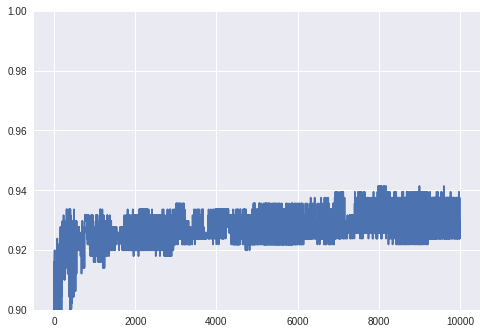

In [34]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000,0.1 )

In [35]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))   #0.9298245614035088 0.9473684210526315

0.9473684210526315


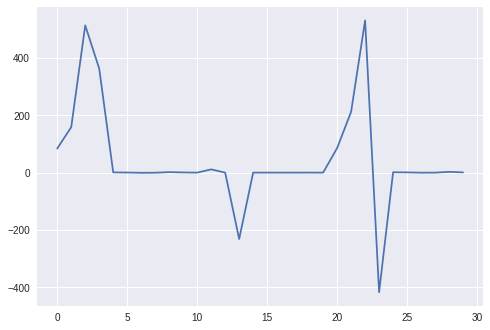

In [37]:
plt.plot(wt_matrix[1,:])
plt.show()
